<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8

## Conceptual

### Question 1

Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1, R_2,...$, the cutpoints $t_1, t_2,...$, and so forth.

*Hint: Your result should look something like Figures 8.1 and 8.2.*

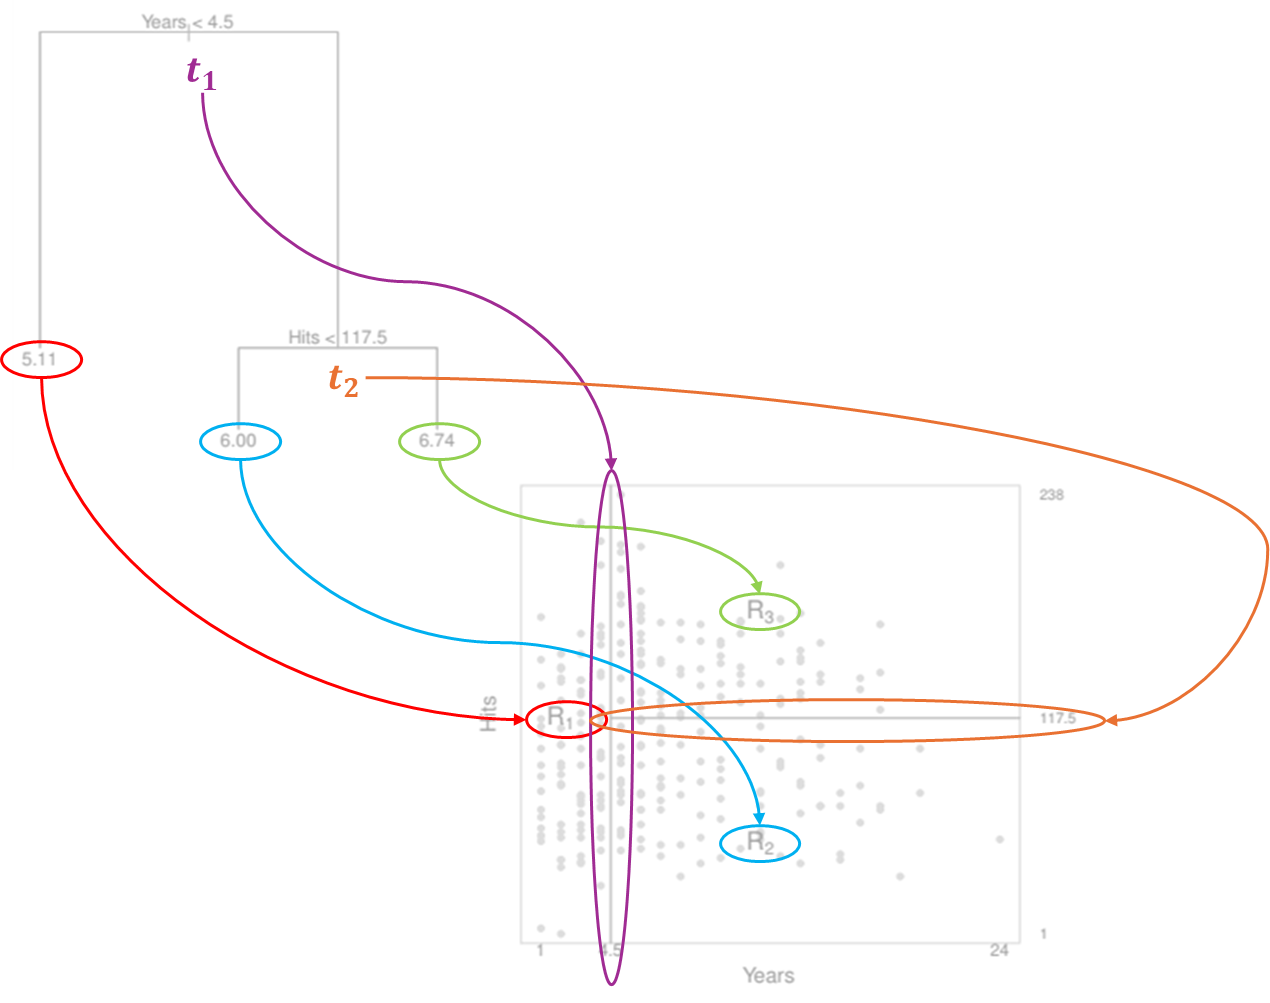

### Question 2

It is mentioned in Section 8.2.3 that boosting using depth-one trees (or *stumps*) leads to an *additive* model: that is, a model of the form

$$f(X) = \sum_{j=1}^p f_j(X_j)$$

Explain why this is the case. You can begin with (8.12) in Algorithm 8.2.

> 1. Set $\hat{f}(x)=0$ and $r_i=y_i$ for all $i$ in the training set.

> 2. For $b = 1, 2,...,B$, repeat:

> > (a) Fit a tree $\hat{f}^b$ with $d$ splits ($d + 1$ terminal nodes) to the training data $(X, r)$.

> > (b) Update $\hat{f}$ by adding in a shrunken version of the new tree:
$$\hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}^b(x)$$

> > (c) Update the residuals,
$$r_i ← r_i − λ\hat{f}^b(x_i)$$

> 3. Output the boosted model,
$$\hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x)$$

I'm not sure what's expected for this answer, but it seems rather intuitive.  Let me answer by analogy and image.

Instead of working in "function space", let's simplify by imagining Cartesian space.  We start from somewhere (blue dot) and then fit a weak-learning function ("weak" because it's so simple) to the data $\hat{f}^1(X)$.  This function *would* cast far from our desired function, so we only step $\lambda$ along that path before fitting a second weak-learning function...then another...then another until we reach our destination $\hat{f}(X)$ (red cross).  So in the end, we've just taken the $\lambda$-weighted sum of all $\hat{f}^b$ weak-learning functions.

$$\hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x)$$

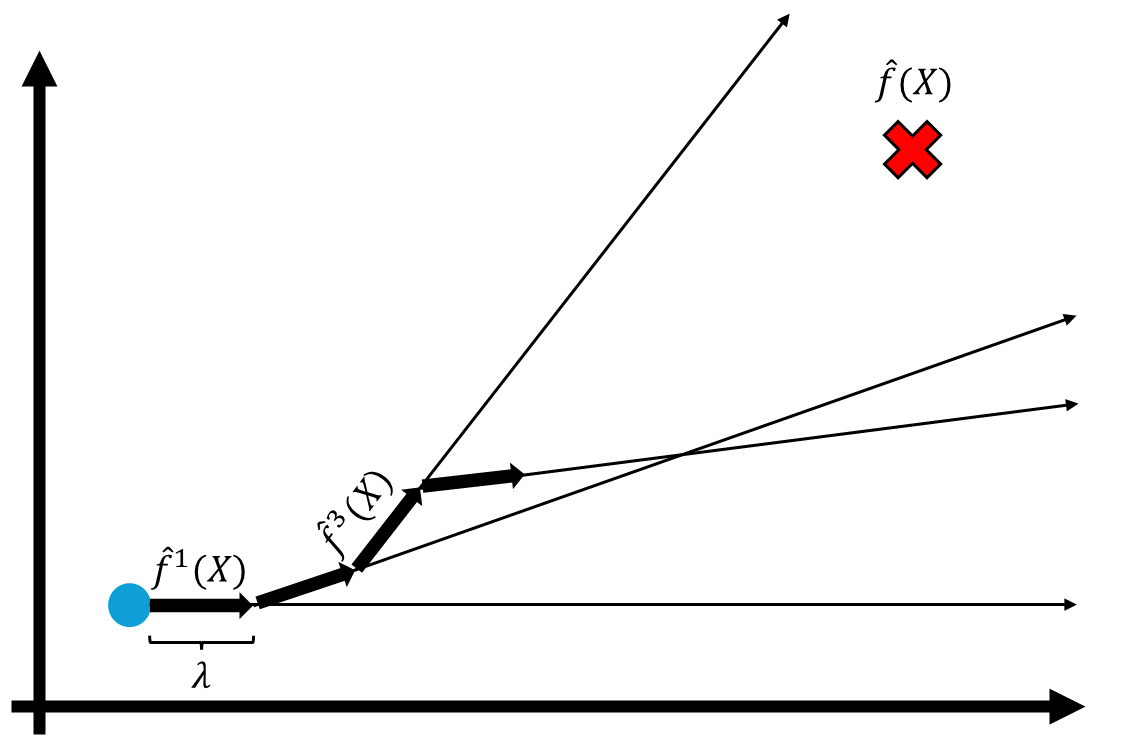

### Question 3

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The $x$-axis should display $\hat{p}_{m1}$, ranging from $0$ to $1$, and the $y$-axis should display the value of the Gini index, classification error, and entropy.

*Hint: In a setting with two classes, $\hat{p}_{m1} = 1 - \hat{p}_{m2}$. You could make this plot by hand, but it will be much easier to make in `R`.*

* **Gini Index:** $G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$
* **Classification Error:** $E = 1 - \max_k(\hat{p}_{mk})$
* **Entropy:** $D = -\sum_{k=1}^K \hat{p}_{mk} \log(\hat{p}_{mk})$

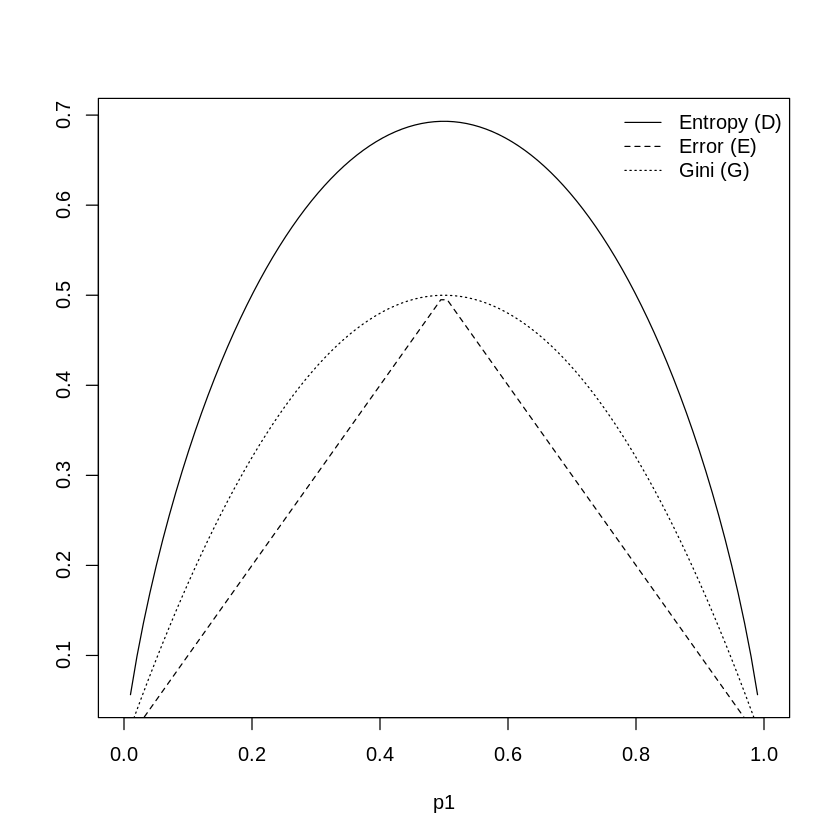

In [ ]:
p2 <- seq(0, 1, length.out = 100)
p1 <- 1 - p2

G <- 2 * p1 * (1 - p1)
E <- 1 - pmax(p1, p2)
D <- -p1 * log(p1) - p2 * log(p2)

plot(D ~ p1, type="l", lty=1, ylab=NA)
lines(E ~ p1, lty=2)
lines(G ~ p1, lty=3)
legend("topright", legend = c("Entropy (D)", "Error (E)", "Gini (G)"),
       lty = c(1, 2, 3), bty = "n")

### Question 4
This question relates to the plots in Figure 8.14.

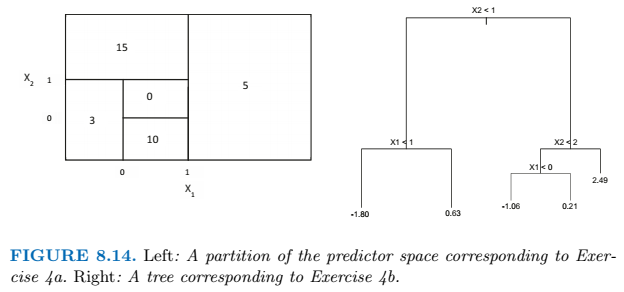

> (a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of Y within each region.

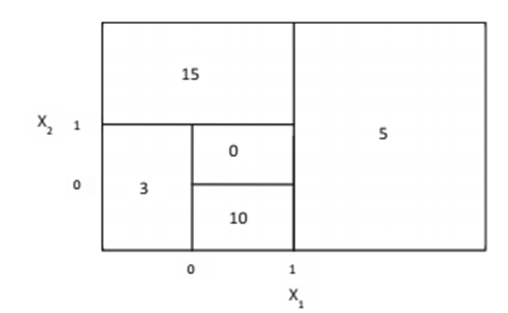

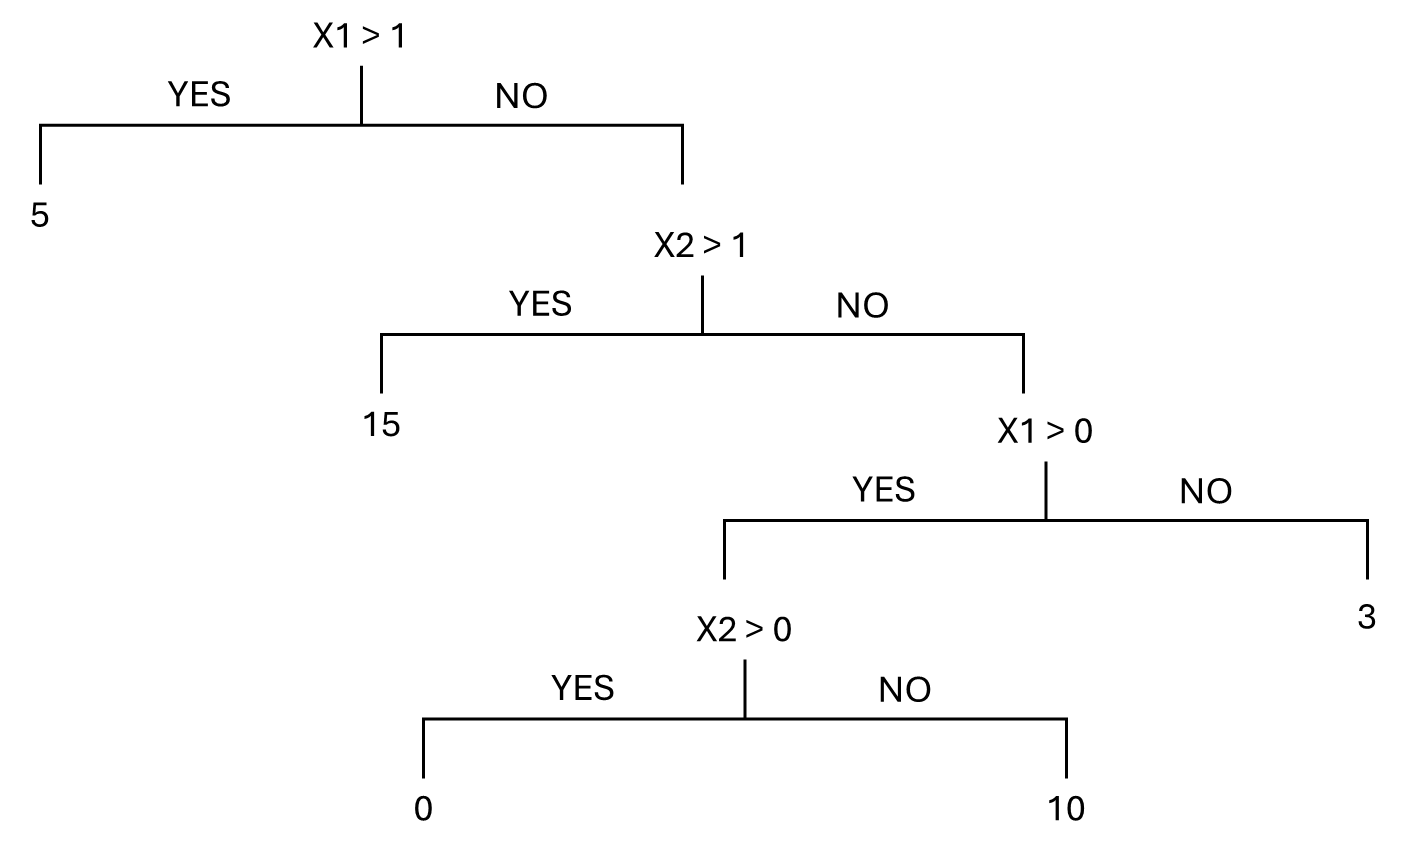

> (b) Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

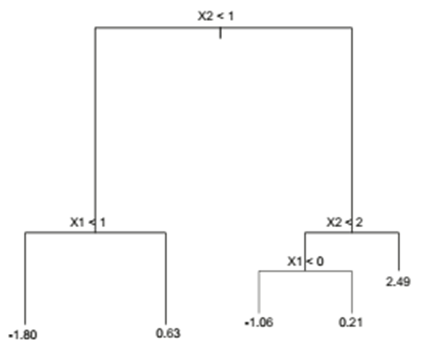

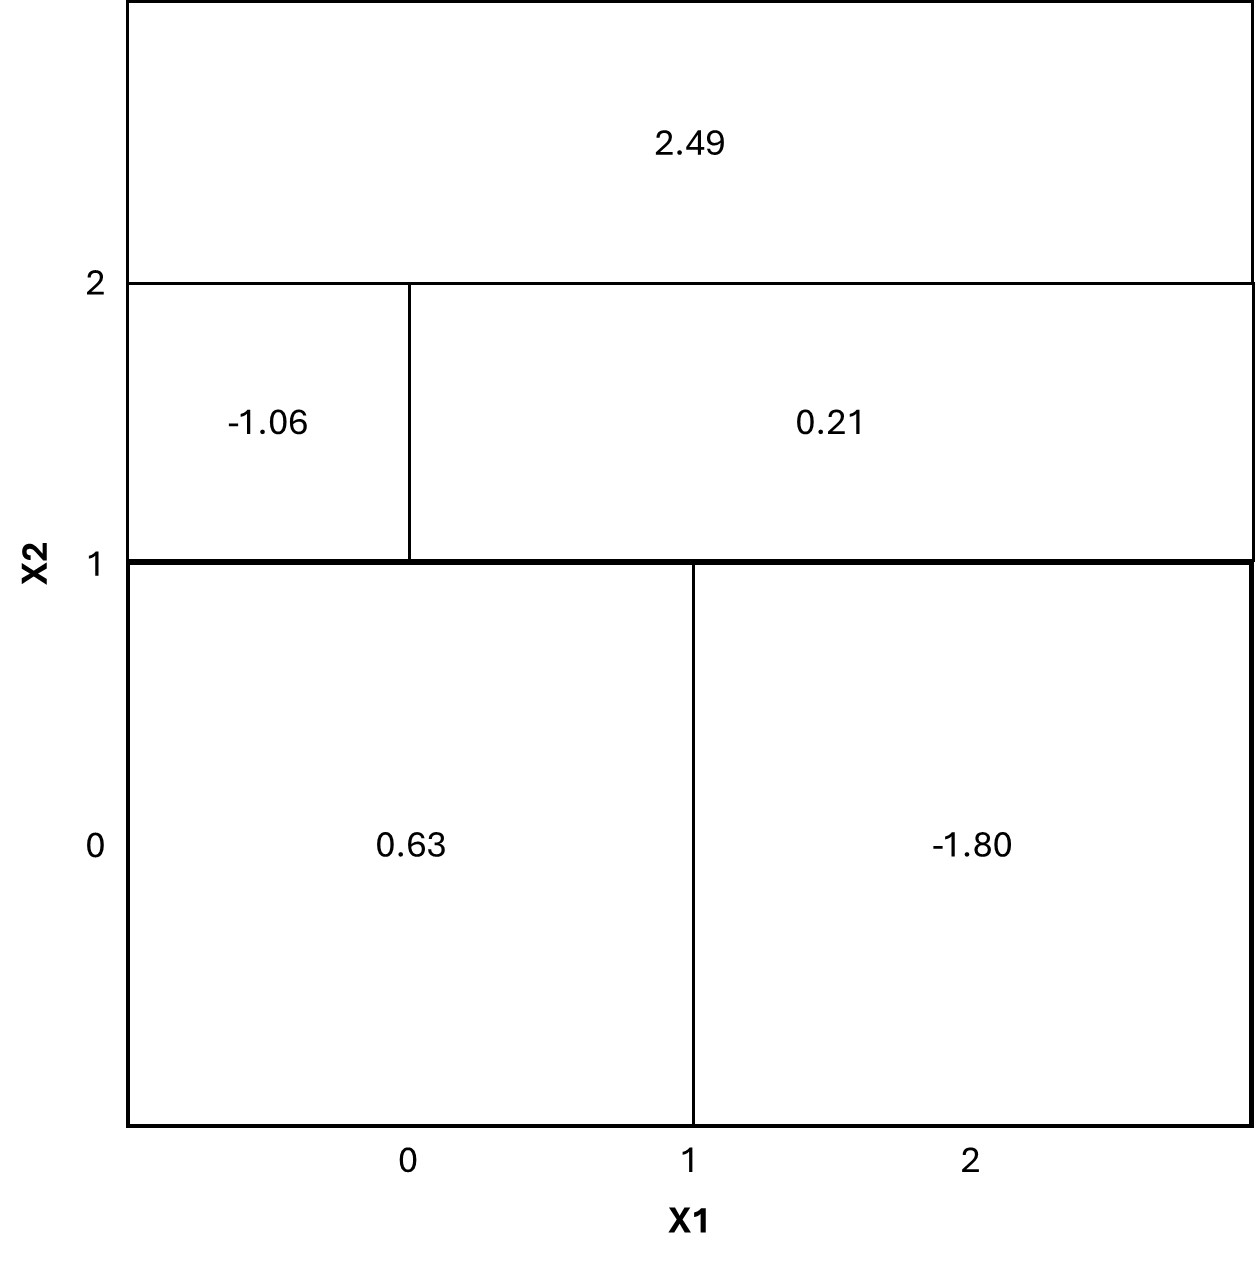

NOTE: I'm using the convention that "No" to the split condition goes right down the tree.

### Question 5

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce 10 estimates of $P(\text{Class is Red}|X)$:

> > $0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, \text{ and } 0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

**Majority Vote:**
$\{G, G, G, G, R, R, R, R, R, R \} \rightarrow \text{Red}$

**Average Probability:**
$\frac{0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75}{10} = \frac{4.5}{10} = 0.45 \rightarrow \text{Green}$

### Question 6

Provide a detailed explanation of the algorithm that is used to fit a regression tree.

I don't do this very often, but I'm going punt on this, since a detailed explanation is given in the chapter.

## Applied

### Question 7

In the lab, we applied random forests to the `Boston` data using `mtry = 6` and using `ntree = 25` and `ntree = 500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for `mtry` and `ntree`. You can model your plot after Figure 8.10. Describe the results obtained.

#### Answer

Let's just start by looking at the `mtry=6` and `ntree=25` or `ntree=500`.  Then, we'll look at a full range.

Much of this code is just copy-pasted from the book, but I had to make a few adjustments.

In [ ]:
install.packages(c("ISLR2", "randomForest"))
library(ISLR2)
library(randomForest)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
set.seed (1)
train <- sample (1: nrow (Boston), nrow (Boston) / 2)
boston.test <- Boston[-train , ]

In [ ]:
bag.boston25 <- randomForest (medv ~ ., data = Boston , subset = train , mtry = 6, ntree=25, importance = TRUE)
yhat.bag25 <- predict (bag.boston25 , newdata = Boston[-train , ])

bag.boston500 <- randomForest (medv ~ ., data = Boston , subset = train , mtry = 6, ntree=500, importance = TRUE)
yhat.bag500 <- predict (bag.boston500 , newdata = Boston[-train , ])

Let's put the errors on the same plot.

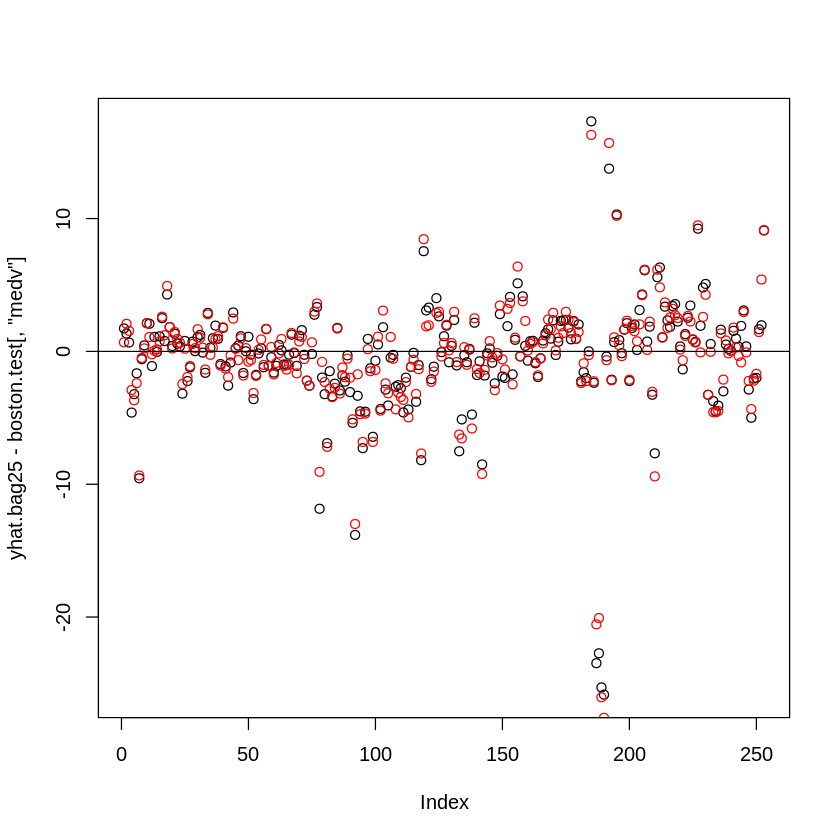

In [ ]:
plot(yhat.bag25 - boston.test[,"medv"])
points(yhat.bag500 -boston.test[,"medv"], col="red")
abline(h=0)

The total errors here are

In [ ]:
(res.bag25 <- round(sum(yhat.bag25 - boston.test[,"medv"])^2,2))
(res.bag500 <- round(sum(yhat.bag500 - boston.test[,"medv"])^2,2))

[1] 12423.32

[1] 11402.17

Now we let's find the test error by running $n_{tree} = 1-500$ trees $m=\{p, p/2, \sqrt{p}\}$ across $p=500$ predictors.  

In [ ]:
n_tree <- 500

xTrain <- Boston[train,-13]
yTrain <- Boston[train, 13]
xTest <- Boston[-train, -13]
yTest <- Boston[-train, 13]

p <- dim(Boston)[2]-1
bag.boston500_p <- randomForest(xTrain, yTrain, xtest=xTest, ytest=yTest, mtry=p, ntree=n_tree, importance=TRUE)

p2 <- p/2
bag.boston500_p2 <- randomForest(xTrain, yTrain, xtest=xTest, ytest=yTest, mtry=p2, ntree=n_tree, importance=TRUE)

sqrt_p <- sqrt(p)
bag.boston500_sqrtp <- randomForest(xTrain, yTrain, xtest=xTest, ytest=yTest, mtry=sqrt_p, ntree=n_tree, importance=TRUE)

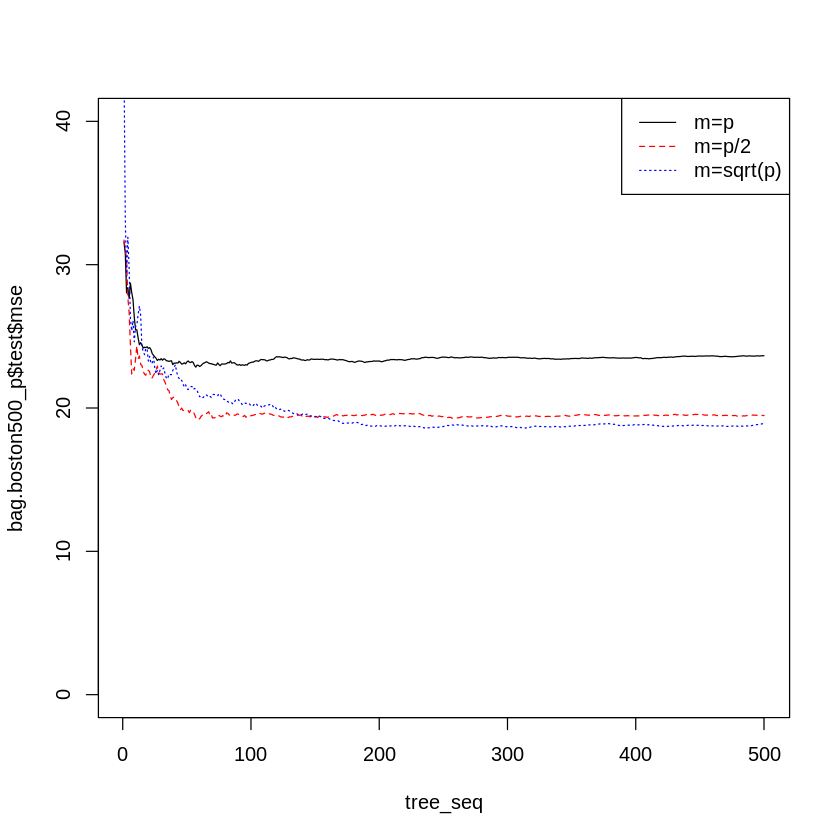

In [ ]:
tree_seq <- 1:500

plot(bag.boston500_p$test$mse ~ tree_seq, type="l", col="black", lty=1, ylim=c(0, 40))
lines(bag.boston500_p2$test$mse ~ tree_seq, col="red", lty=2)
lines(bag.boston500_sqrtp$test$mse ~ tree_seq, col="blue", lty=3)

legend("topright", c("m=p", "m=p/2", "m=sqrt(p)"), col = c("black", "red", "blue"), lty = c(1,2,3))

### Question 8

In the lab, a classification tree was applied to the `Carseats` data set after converting `Sales` into a qualitative response variable. Now we will seek to predict `Sales` using regression trees and related approaches, treating the response as a quantitative variable.

> (a) Split the data set into a training set and a test set.

> (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

> (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

> (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the `importance()` function to determine which variables are most important.

> (e) Use random forests to analyze this data. What test MSE do you obtain? Use the `importance()` function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

> (f) Now analyze the data using BART, and report your results.

#### Answers

In [ ]:
install.packages(c("ISLR2", "tree"))
library(ISLR2)
library(tree)

data(Carseats)
d <- Carseats

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##### Answer to a

***Split the data set into a training set and a test set.***

In [ ]:
train_pct <- 0.8
train_ind <- sample(1:nrow(d), floor(nrow(d)*train_pct), replace=FALSE)

d_train <- d[train_ind,]
X_train <- d_train[,-1]
y_train <- d_train[,1]
d_test <- d[-train_ind,]
X_test <- d_test[,-1]
y_test <- d_test[,1]

##### Answer to b

***Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?***

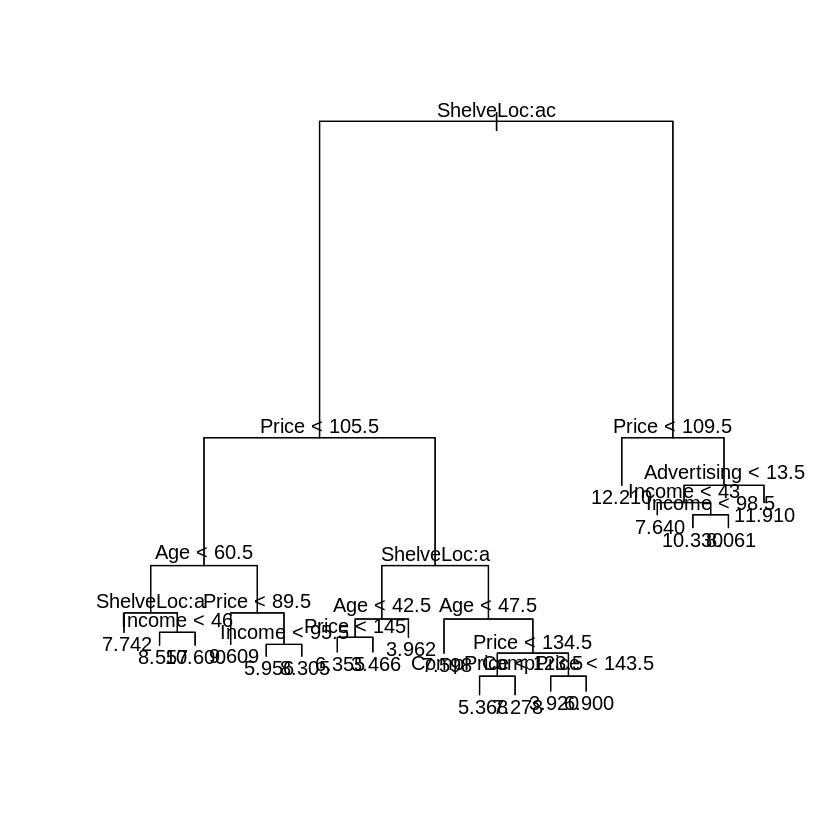

In [ ]:
m <- tree(Sales ~ ., data=d_train)
plot(m); text(m)

[1] 5.107503

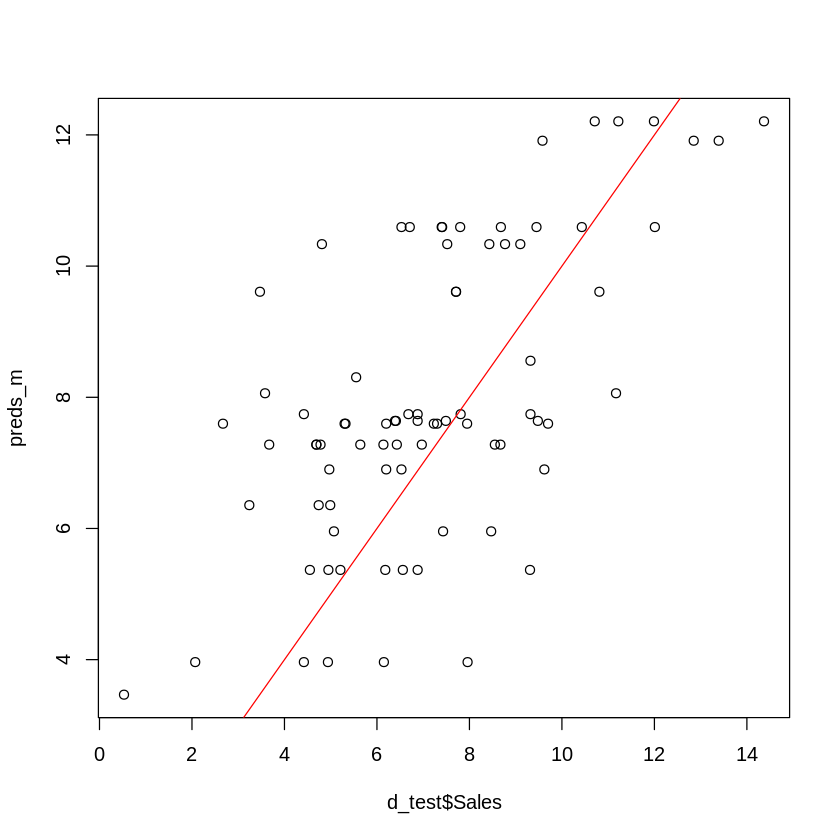

In [ ]:
preds_m <- predict(m, d_test)
plot(preds_m ~ d_test$Sales); abline(a=0, b=1, col="red")
(mse_m <- mean((preds_m - d_test$Sales)^2))

##### Answer to c

***Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?***

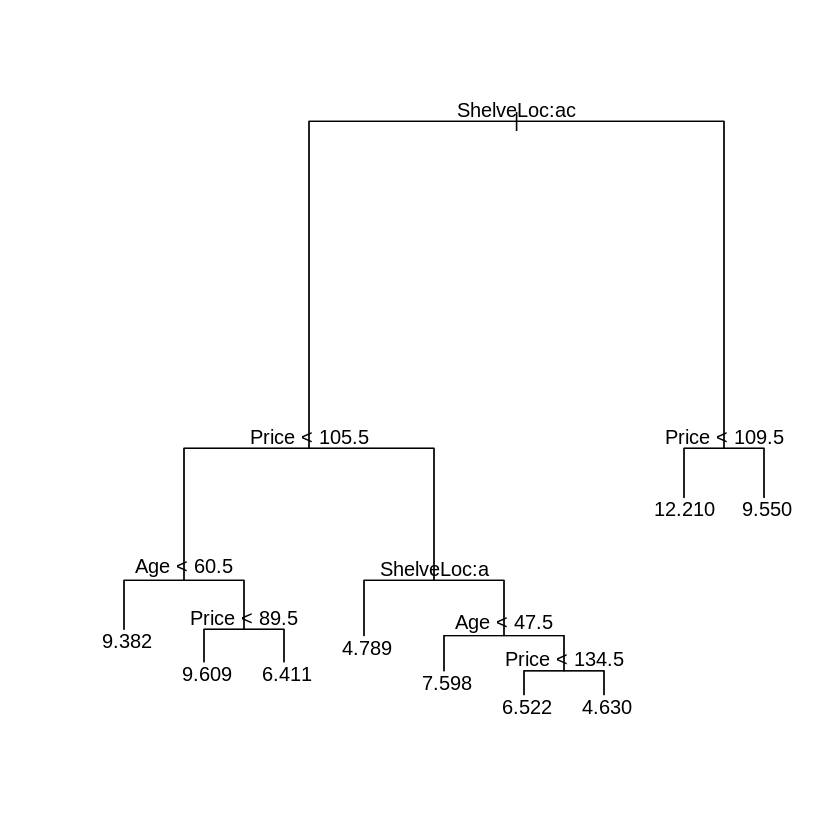

In [ ]:
cv_m <- cv.tree(m)
best_p <- cv_m$size[which.min(cv_m$dev)]

prune_m <- prune.tree(m, best = best_p)
plot(prune_m); text(prune_m)

[1] 5.213118

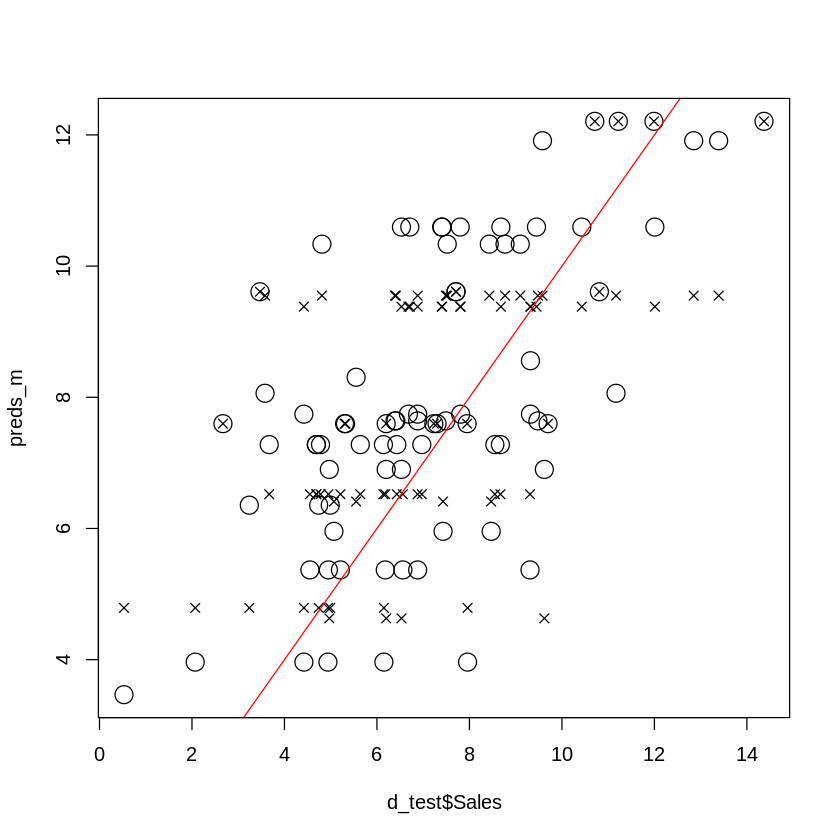

In [ ]:
preds_prune <- predict(prune_m, d_test)
plot(preds_m ~ d_test$Sales, col="black", cex=2)
points(preds_prune ~ d_test$Sales, col="black", pch=4)
abline(a=0, b=1, col="red")
(mse_prune <- mean((preds_prune - d_test$Sales)^2))

##### Answer to d

***Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the `importance()` function to determine which variables are most important.***

Recall that bagging is just random forest with m = p.

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
m_bag <- randomForest(Sales ~ ., data=d_train, mtry=ncol(X_train), importance=TRUE, ntree=500)
bag_pred <- predict(m_bag, d_test)
(bag_mse <- mean((d_test$Sales - bag_pred)^2))

[1] 2.761479

In [ ]:
importance(m_bag)

,%IncMSE,IncNodePurity
CompPrice,34.62245798,265.266491
Income,12.62297407,130.733268
Advertising,18.63830662,157.141254
Population,-0.36388015,77.544754
Price,74.74452238,736.446428
ShelveLoc,82.34245453,871.842043
Age,25.14884788,251.143392
Education,0.68205355,54.735841
Urban,-0.08270416,7.713254
US,4.72036538,11.257971


##### Answer to e

***Use random forests to analyze this data. What test MSE do you obtain? Use the `importance()` function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.***

Once again, recall that a random forest is just like bagging with m < p.  Let's try several values of m.

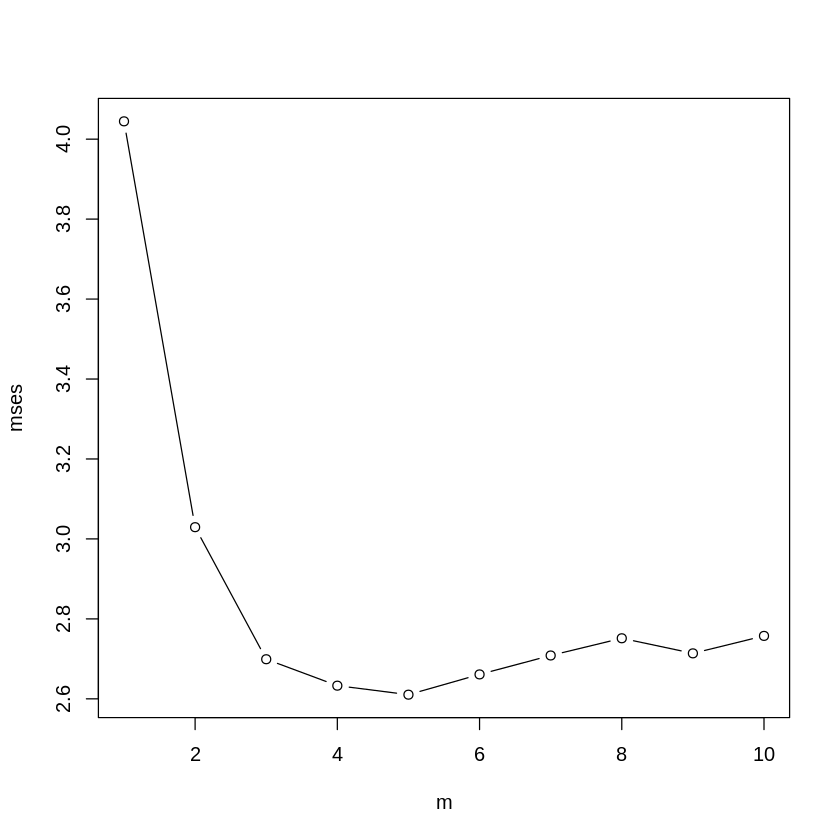

In [ ]:
m <- 1:(ncol(X_train))
mses <- numeric(length=length(m))
for(i in 1:length(m)){
  m_forest <- randomForest(Sales ~ ., data=d_train, mtry=i, importance=TRUE, ntree=500)
  forest_pred <- predict(m_forest, d_test)
  mses[i] <- mean((d_test$Sales - forest_pred)^2)
}

plot(mses ~ m, type="b")

In *this* particular run, `mtry=7` is doing the best.  Let's look at the `importance()` of each variable.

In [ ]:
m_forest <- randomForest(Sales ~ ., data=d_train, mtry=5, importance=TRUE, ntree=500)
importance(m_forest)

,%IncMSE,IncNodePurity
CompPrice,23.5003426,240.24067
Income,7.9181594,169.06152
Advertising,18.2655377,181.00960
Population,-0.9770022,104.41264
Price,60.8500978,689.98578
ShelveLoc,69.1720271,771.67327
Age,19.8957566,272.82302
Education,-1.0955101,76.52654
Urban,-1.7099980,12.97220
US,2.9414522,22.74143


Also, the MSE.

In [ ]:
forest_pred <- predict(m_forest, X_test)
(forest_mse <- mean((forest_pred - y_test)^2))

[1] 2.635071

##### Answer to f

***Now analyze the data using BART, and report your results.***

In [ ]:
install.packages("BART")
library(BART)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: nlme

Loading required package: survival



In [ ]:
mBART <- gbart(X_train, y_train, X_test)
BART_preds <- mBART$yhat.test.mean
BART_mses <- mean((BART_preds - y_test)^2)
BART_mses

[1] 1.424925

In [ ]:
(mse_m <- mean((preds_m - d_test$Sales)^2))
(mse_prune <- mean((preds_prune - d_test$Sales)^2))
(bag_mse <- mean((d_test$Sales - bag_pred)^2))
(forest_mse <- mean((forest_pred - y_test)^2))

[1] 5.107503

[1] 5.213118

[1] 2.761479

[1] 2.635071

BART performs best, with the lowest MSE.

### Question 9

This problem involves the `OJ` data set which is part of the `ISLR2` package.

> (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

> (b) Fit a tree to the training data, with `Purchase` as the response and the other variables as predictors. Use the `summary()` function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

> (c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

> (d) Create a plot of the tree, and interpret the results.

> (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

> (f) Apply the `cv.tree()` function to the training set in order to determine the optimal tree size.

> (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

> (h) Which tree size corresponds to the lowest cross-validated classi- fication error rate?

> (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

> (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

> (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

#### Answer to a

***Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.***

In [1]:
install.packages("ISLR2")
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
data(OJ)

train_p <- 0.8
train_ind <- sample(x=1:nrow(OJ), size=floor(nrow(OJ)*train_p), replace=FALSE)
train_d <- OJ[train_ind,]
train_X <- train_d[,-1]
train_y <- train_d$Purchase
test_d <- OJ[-train_ind,]
test_X <- test_d[,-1]
test_y <- test_d$Purchase